In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Reading data from csv file**

In [4]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head(80)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
75,male,group B,associate's degree,free/reduced,none,44,41,38
76,male,group E,some high school,standard,none,30,26,22
77,male,group A,bachelor's degree,standard,completed,80,78,81
78,female,group D,some high school,standard,completed,61,74,72


**Grouping by features**

In [5]:
gend = df.groupby("gender").mean()
gend.reset_index(inplace=True)
gend

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [6]:
race = df.groupby("race/ethnicity").mean()
race

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


**Visualization data**

<AxesSubplot:xlabel='gender', ylabel='math score'>

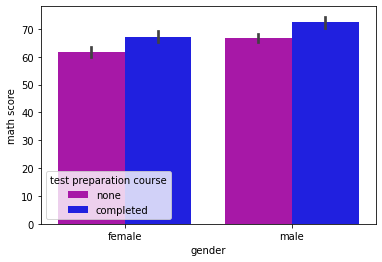

In [7]:
sns.barplot(x="gender", y="math score", hue="test preparation course", palette=["m", "b"], data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

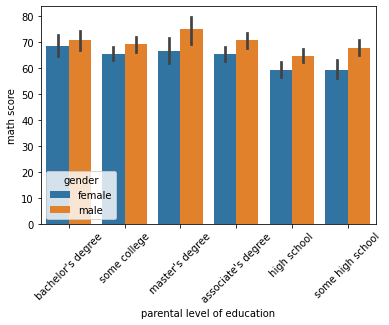

In [8]:
ax = sns.barplot(hue="gender", y="math score", x="parental level of education", data=df)
plt.xticks(rotation=45)

**Data Processing**

In [9]:
def sg(val):
    if val < 50:
        return "NQ"
    elif 50<=val<60:
        return "group d"
    elif 60<=val<70:
        return "group c"
    elif 70<=val<80:
        return "group b"
    elif 80<=val:
        return "group a"
    else:
        return "MQ"

In [10]:
df['mean'] = (df["math score"]+df["reading score"]+df["writing score"])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<AxesSubplot:xlabel='mean', ylabel='lunch'>

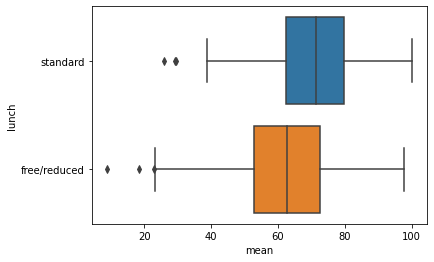

In [11]:
sns.boxplot(data=df, x="mean", y="lunch")

In [12]:
df["group"] = df["mean"].apply(sg)

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean,group
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,group b
1,female,group C,some college,standard,completed,69,90,88,82.333333,group a
2,female,group B,master's degree,standard,none,90,95,93,92.666667,group a
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,NQ
4,male,group C,some college,standard,none,76,78,75,76.333333,group b


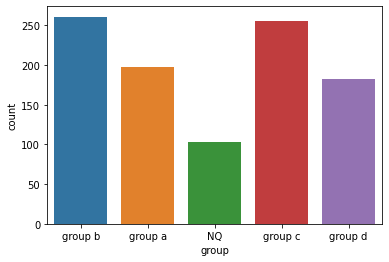

In [14]:
ax = sns.countplot(x="group", data=df)

**Data Preparing**

In [21]:
df =  df.replace(["female", "male", "group A","group B", "group C", "group D","group E"],[0,1,0,1,2,3,4])
df =  df.replace(["bachelor's degree", "some college", "master's degree","associate's degree", "high school", "some high school","none","completed","standard", "free/reduced"],[01,2,3,4,5,6,0,1,0,1])
df =  df.replace(["group a","group b", "group c", "group d","NQ"],[1,2,3,4,5])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean,group
0,1,2,1,0,0,72,72,74,72.666667,2
1,1,3,2,0,1,69,90,88,82.333333,1
2,1,2,3,0,0,90,95,93,92.666667,1
3,2,1,4,1,0,47,57,44,49.333333,5
4,2,3,2,0,0,76,78,75,76.333333,2


In [63]:
feature_cols = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]
X = df[feature_cols]
y = df["group"]

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [65]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

**Modelling**

In [66]:
from sklearn.linear_model import LogisticRegression

In [79]:
logreg = LogisticRegression(max_iter=10000)

In [80]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [81]:
print(logreg.predict(X_test))

[1 3 3 3 1 1 1 2 0 2 1 3 0 2 1 3 2 0 2 0 2 3 2 2 3 3 2 1 3 0 3 0 2 2 1 2 1
 1 0 1 1 3 2 0 2 0 2 2 0 2 2 3 3 2 1 1 3 2 1 3 3 0 1 2 2 3 2 2 1 2 1 3 1 1
 3 1 1 2 2 2 0 1 0 2 0 1 3 0 1 2 3 2 3 3 1 2 4 3 3 2 1 3 2 2 2 2 1 2 1 1 0
 0 3 3 1 1 1 3 3 1 3 3 0 2 1 1 2 1 1 1 1 1 4 1 1 1 0 1 1 1 0 2 1 2 3 3 4 4
 1 1 2 1 0 1 0 1 3 1 1 2 1 1 4 2 1 2 1 2 1 1 1 1 2 1 1 1 1 2 0 1 1 2 3 2 1
 2 0 0 2 2 2 2 1 2 3 3 2 2 1 2 3 1 0 1 1 3 2 1 1 1 1 0 3 1 3 3 0 2 3 1 3 1
 1 1 1 1 1 1 1 2 3 3 3 2 4 1 1 0 1 2 1 2 0 2 1 1 2 2 1 2]


In [70]:
print(logreg.score(X_test, y_test))

0.2


**RandomForestClassifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [91]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
print(clf.feature_importances_)

[0.0968824  0.34742094 0.39106615 0.07711222 0.08751829]


In [93]:
print(clf.predict(X_test))

[0 2 3 2 2 2 0 1 1 3 2 3 0 1 1 4 2 1 2 2 0 3 1 3 4 2 0 1 4 0 2 0 2 2 2 1 2
 3 1 3 1 3 2 0 2 1 1 0 1 1 1 3 4 1 1 0 3 3 0 3 4 2 0 1 3 4 3 1 2 1 1 1 3 1
 4 1 0 3 2 2 0 2 1 3 0 1 4 2 3 1 2 2 3 3 1 1 4 3 3 2 2 4 2 0 1 0 1 3 3 1 1
 0 3 2 0 0 2 2 4 2 3 4 0 2 1 1 1 3 1 0 4 1 4 0 1 1 0 3 2 1 0 2 1 1 4 3 3 4
 1 1 2 2 1 1 0 3 1 2 2 2 1 2 4 1 2 3 2 1 1 1 2 0 0 0 2 1 3 2 0 1 1 2 4 1 3
 3 1 1 1 2 3 0 1 1 4 2 2 3 2 4 1 2 0 2 1 4 2 2 2 1 2 0 4 0 1 3 2 1 2 2 4 2
 1 0 0 3 2 3 1 0 4 3 3 2 4 0 3 0 1 0 3 1 1 2 2 0 3 0 2 2]


In [94]:
X_test.iloc[0]

gender                         1
race/ethnicity                 4
parental level of education    1
lunch                          1
test preparation course        0
Name: 993, dtype: int64

In [96]:
y_test.iloc[0]

3

In [95]:
print(clf.score(X_test, y_test))

0.236
